<a href="https://colab.research.google.com/github/DanielFirman/car_sales/blob/main/car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning & Data Preprocessing

In [68]:
df = pd.read_csv('car_sales.csv')

In [69]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [70]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.','')

In [71]:
df.head()

,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price_($),dealer_no,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23906 non-null  object
 1   date           23906 non-null  object
 2   customer_name  23905 non-null  object
 3   gender         23906 non-null  object
 4   annual_income  23906 non-null  int64 
 5   dealer_name    23906 non-null  object
 6   company        23906 non-null  object
 7   model          23906 non-null  object
 8   engine         23906 non-null  object
 9   transmission   23906 non-null  object
 10  color          23906 non-null  object
 11  price_($)      23906 non-null  int64 
 12  dealer_no      23906 non-null  object
 13  body_style     23906 non-null  object
 14  phone          23906 non-null  int64 
 15  dealer_region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [73]:
df.dropna(subset=['customer_name'], inplace=True)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23905 non-null  object
 1   date           23905 non-null  object
 2   customer_name  23905 non-null  object
 3   gender         23905 non-null  object
 4   annual_income  23905 non-null  int64 
 5   dealer_name    23905 non-null  object
 6   company        23905 non-null  object
 7   model          23905 non-null  object
 8   engine         23905 non-null  object
 9   transmission   23905 non-null  object
 10  color          23905 non-null  object
 11  price_($)      23905 non-null  int64 
 12  dealer_no      23905 non-null  object
 13  body_style     23905 non-null  object
 14  phone          23905 non-null  int64 
 15  dealer_region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [75]:
df.duplicated().sum()

0

In [76]:
df.isna().sum()

car_id           0
date             0
customer_name    0
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price_($)        0
dealer_no        0
body_style       0
phone            0
dealer_region    0
dtype: int64

In [77]:
df.rename(columns={'price_($)': 'price_usd'}, inplace=True)


In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
df['date']

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: date, Length: 23905, dtype: datetime64[ns]

In [80]:
df.describe()

,date,annual_income,price_usd,phone
count,23905,2.390500e+04,23905.000000,2.390500e+04
mean,2023-03-01 14:35:12.261033216,8.308466e+05,28089.540473,7.497753e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746465e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496199e+06
75%,2023-09-08 00:00:00,1.176000e+06,34000.000000,8.248172e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200208e+05,14788.592495,8.675080e+05


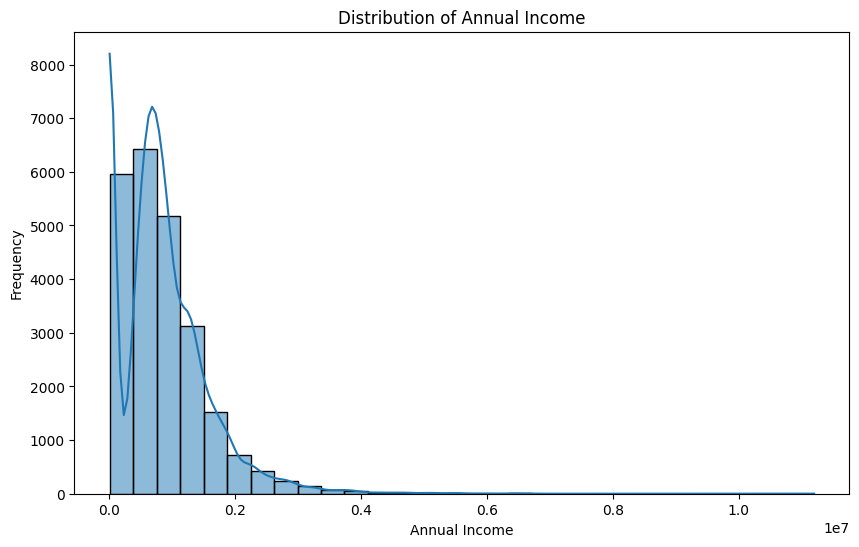

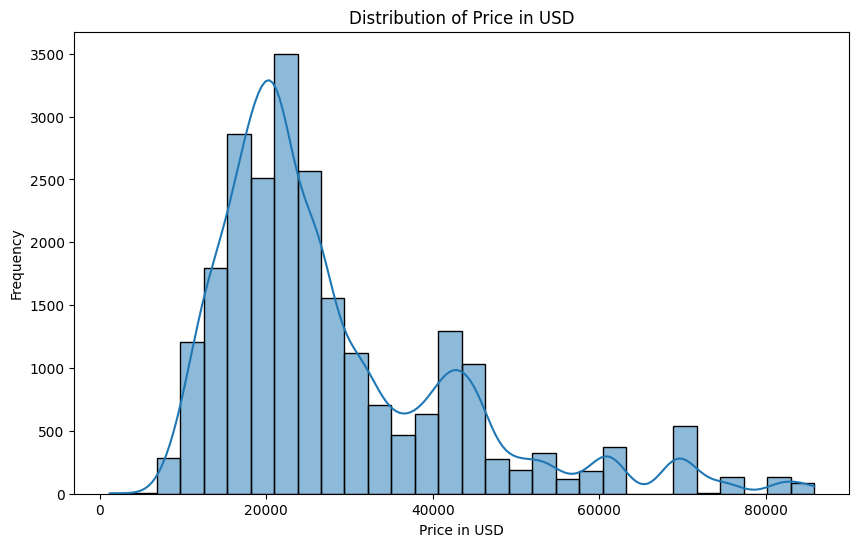

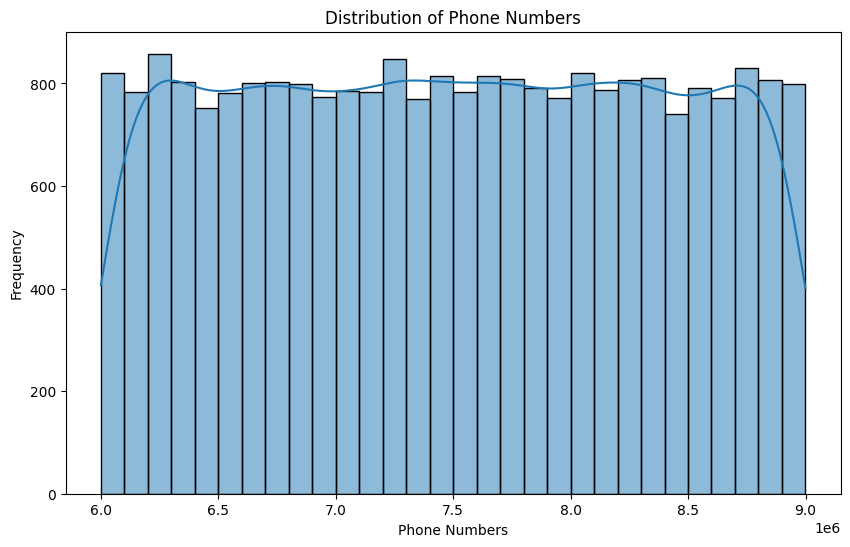

In [81]:
# Histogram untuk annual_income
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk price_usd
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Distribution of Price in USD')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk phone
plt.figure(figsize=(10, 6))
sns.histplot(df['phone'], bins=30, kde=True)
plt.title('Distribution of Phone Numbers')
plt.xlabel('Phone Numbers')
plt.ylabel('Frequency')
plt.show()


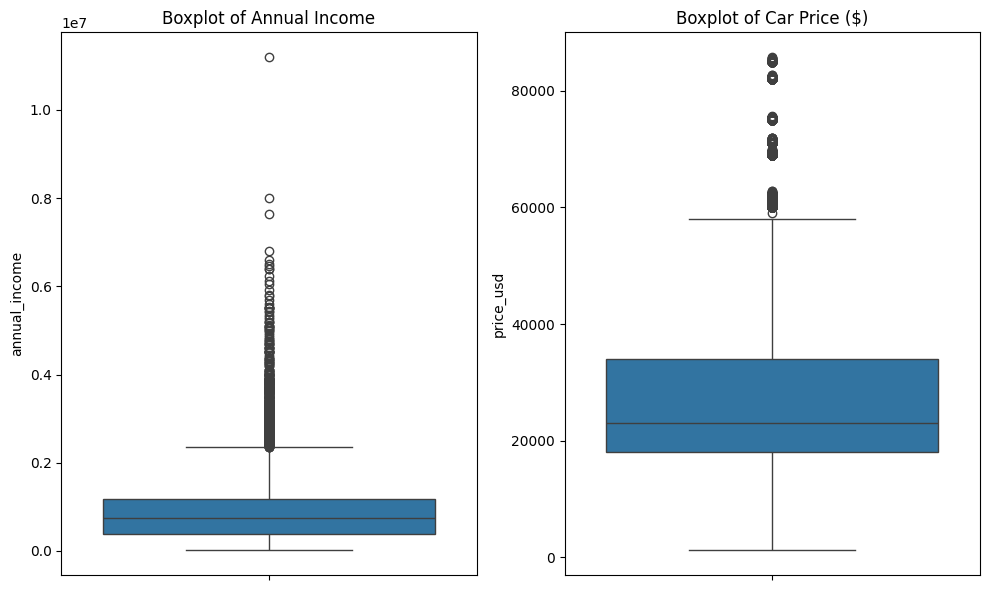

In [83]:
# Setting up the figure size
plt.figure(figsize=(10, 6))

# Boxplot untuk annual_income
plt.subplot(1, 2, 1)
sns.boxplot(y=df['annual_income'])
plt.title('Boxplot of Annual Income')

# Boxplot untuk price_($)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price_usd'])
plt.title('Boxplot of Car Price ($)')

plt.tight_layout()
plt.show()


In [101]:
Q1 = df['annual_income'].quantile(0.25)
Q3 = df['annual_income'].quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1
print(f"IQR : {IQR:.2f}")

# Menghitung batas atas (Maximum Boundary)
max_bound_income = Q3 + 1.5 * IQR
print(f"Maximum Boundary : {max_bound_income:.2f}")

# Menentukan outlier
outliers = df[df['annual_income'] > max_bound_income]

Q1 : 386000.00
Q3 : 1176000.00
IQR : 790000.00
Maximum Boundary : 2361000.00


In [102]:
# Filter data tanpa outlier
df_filtered = df[df["annual_income"] < max_bound_income]

# Validasi hasil filter dengan melihat statistik deskriptif
print(df_filtered["annual_income"].describe())

count    2.308900e+04
mean     7.496453e+05
std      5.636218e+05
min      1.008000e+04
25%      3.600000e+05
50%      7.150000e+05
75%      1.100000e+06
max      2.360000e+06
Name: annual_income, dtype: float64


In [99]:
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1
print(f"IQR : {IQR:.2f}")

# Menghitung batas atas (Maximum Boundary)
max_bound_price = Q3 + 1.5 * IQR
print(f"Maximum Boundary : {max_bound_price:.2f}")

# Menentukan outlier
outliers = df[df['price_usd'] > max_bound_price]

Q1 : 18001.00
Q3 : 34000.00
IQR : 15999.00
Maximum Boundary : 57998.50


In [100]:
# Filter data tanpa outlier
df_filtered = df[df["price_usd"] < max_bound_price]

# Validasi hasil filter dengan melihat statistik deskriptif
print(df_filtered["price_usd"].describe())

count    22456.000000
mean     25452.087371
std      10687.046147
min       1200.000000
25%      18000.000000
50%      22001.000000
75%      31000.000000
max      57990.000000
Name: price_usd, dtype: float64


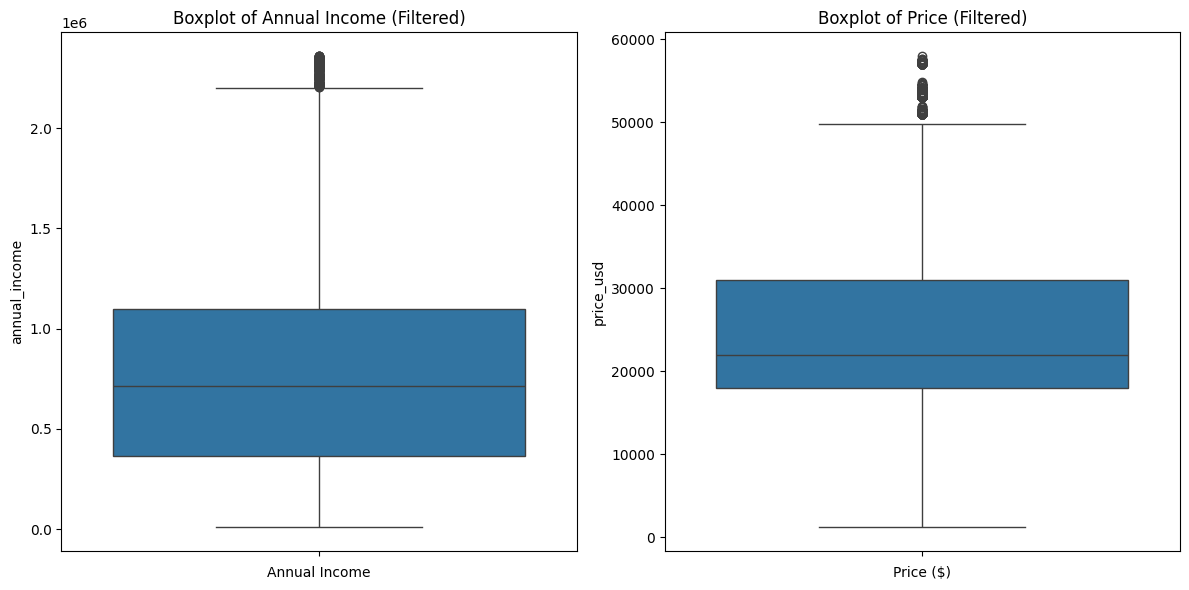

In [107]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_filtered['annual_income'])
plt.title('Boxplot of Annual Income (Filtered)')
plt.xlabel('Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_filtered['price_usd'])
plt.title('Boxplot of Price (Filtered)')
plt.xlabel('Price ($)')

plt.tight_layout()
plt.show()

# EDA

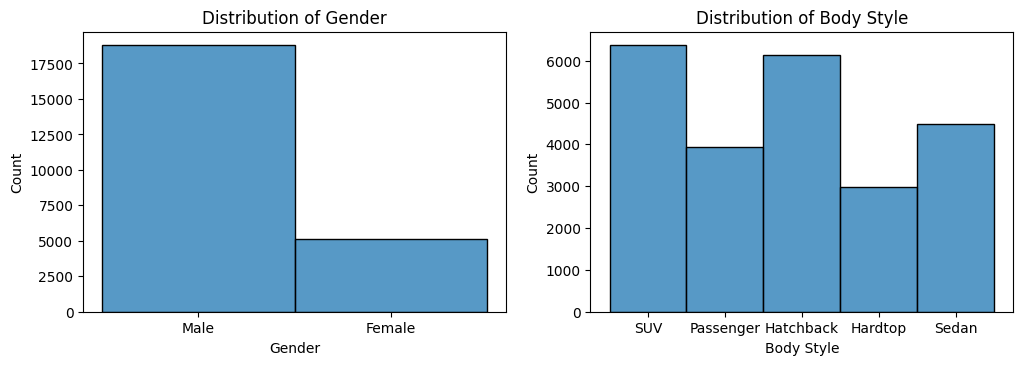

In [109]:
plt.figure(figsize=(12, 8))

# Histogram untuk gender
plt.subplot(2, 2, 1)
sns.histplot(df, x='gender', kde=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Histogram untuk body_style
plt.subplot(2, 2, 2)
sns.histplot(df, x='body_style', kde=False)
plt.title('Distribution of Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')

plt.show()


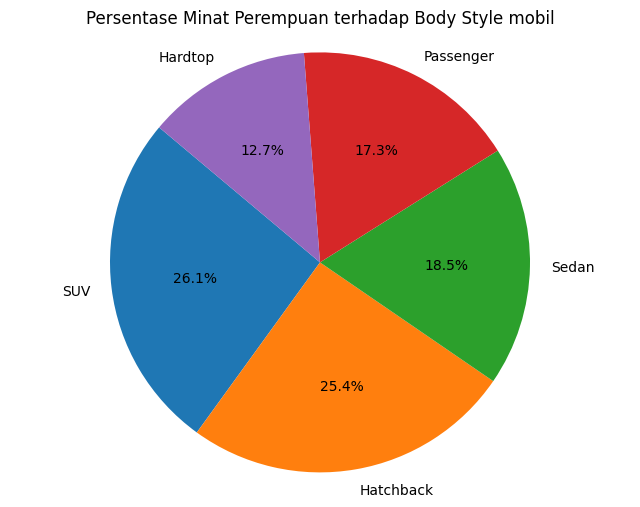

In [110]:
total_female_cars = df[df['gender'] == 'Female'].shape[0]

female_body_style_counts = df[df['gender'] == 'Female']['body_style'].value_counts()

female_body_style_proportions = female_body_style_counts / total_female_cars * 100

plt.figure(figsize=(8, 6))
plt.pie(female_body_style_proportions, labels=female_body_style_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Minat Perempuan terhadap Body Style mobil')
plt.axis('equal')
plt.show()


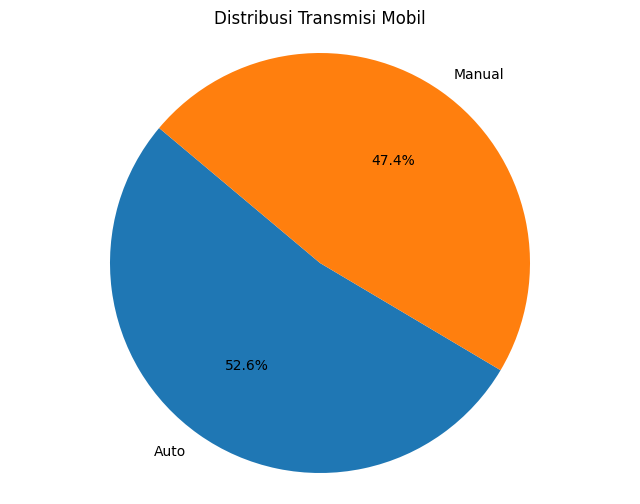

In [111]:
transmission_counts = df['transmission'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Transmisi Mobil')
plt.axis('equal')
plt.show()

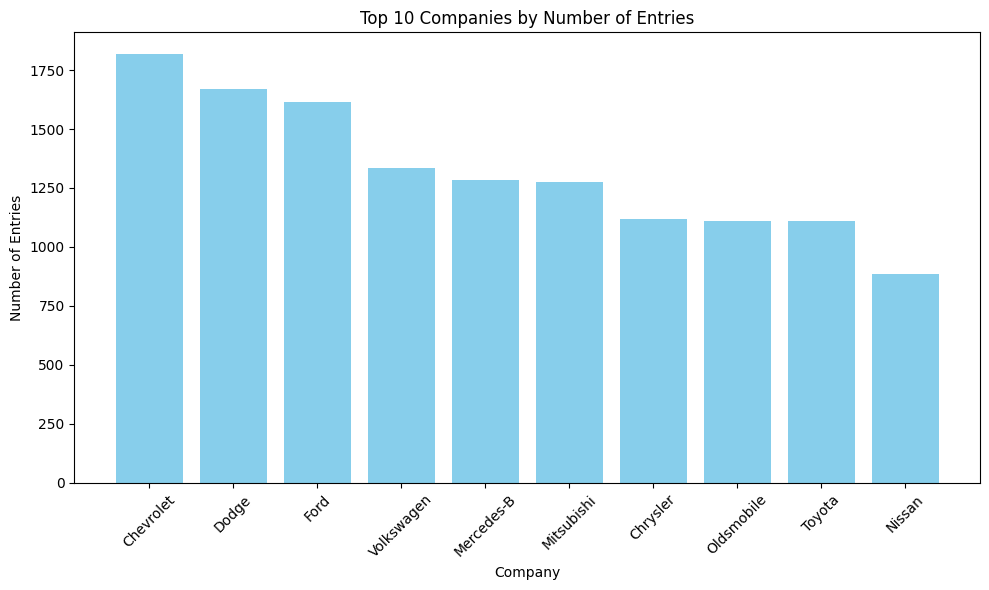

In [112]:
company_counts = df['company'].value_counts().reset_index(name='count')
company_counts.columns = ['company', 'total_count']

top_10_companies = company_counts.sort_values(by='total_count', ascending=False).head(10)

# Plot bar chart untuk top 10 perusahaan
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company'], top_10_companies['total_count'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Entries')
plt.title('Top 10 Companies by Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

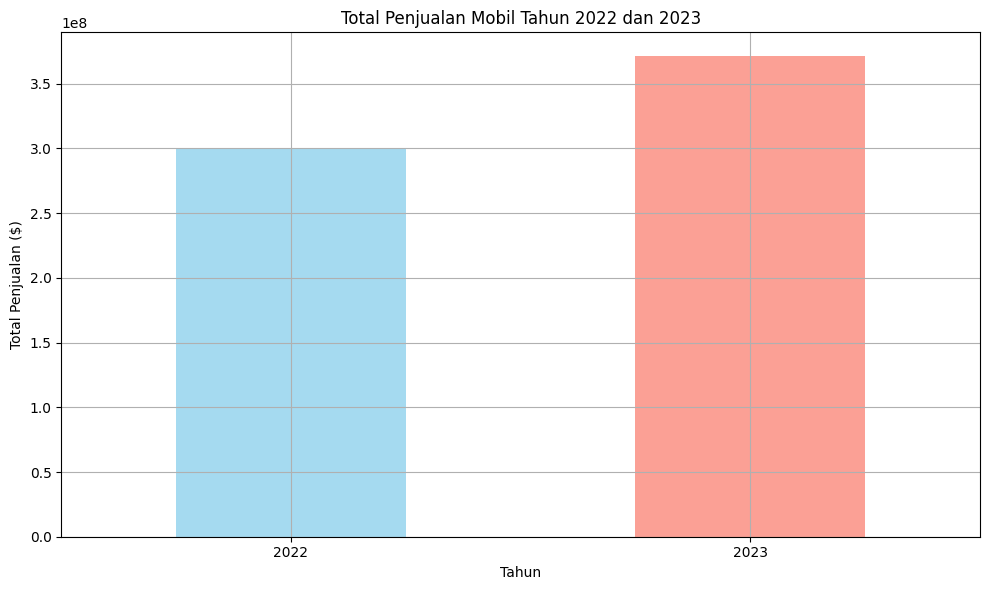

        count          mean           std     min      25%      50%      75%  \
year                                                                           
2022  10644.0  28212.640455  14835.969390  9000.0  18001.0  23000.0  34000.0   
2023  13261.0  27990.733730  14750.271638  1200.0  18001.0  22601.0  34000.0   

          max  
year           
2022  85800.0  
2023  85601.0  


In [116]:
# Filter data untuk tahun 2022 dan 2023
df['year'] = df['date'].dt.year  # Mengambil tahun dari kolom 'date'
df_2022_2023 = df[df['year'].isin([2022, 2023])]

# Menghitung total penjualan per tahun
annual_sales = df_2022_2023.groupby('year')['price_usd'].sum()

# Visualisasi tren penjualan tahun 2022 dan 2023
plt.figure(figsize=(10, 6))
annual_sales.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.75)
plt.title('Total Penjualan Mobil Tahun 2022 dan 2023')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan ($)')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Statistik deskriptif untuk penjualan per tahun
annual_sales_stats = df_2022_2023.groupby('year')['price_usd'].describe()
print(annual_sales_stats)

Persentase kenaikan penjualan dari tahun 2022 ke 2023: 23.61%

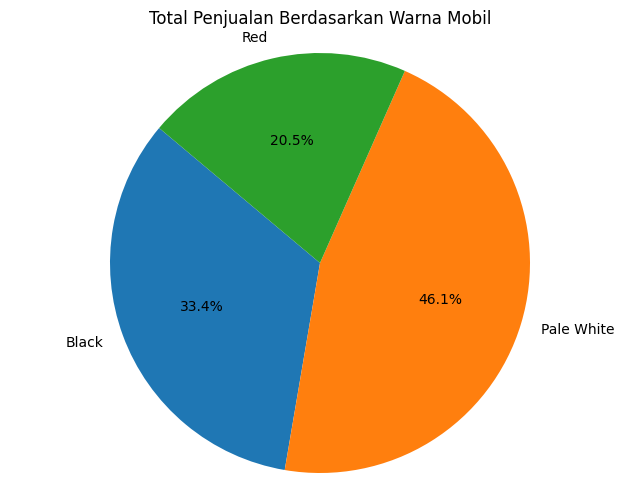

In [118]:
total_sales_by_color = df.groupby('color')['price_usd'].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_sales_by_color['price_usd'], labels=total_sales_by_color['color'], autopct='%1.1f%%', startangle=140)
plt.title('Total Penjualan Berdasarkan Warna Mobil')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


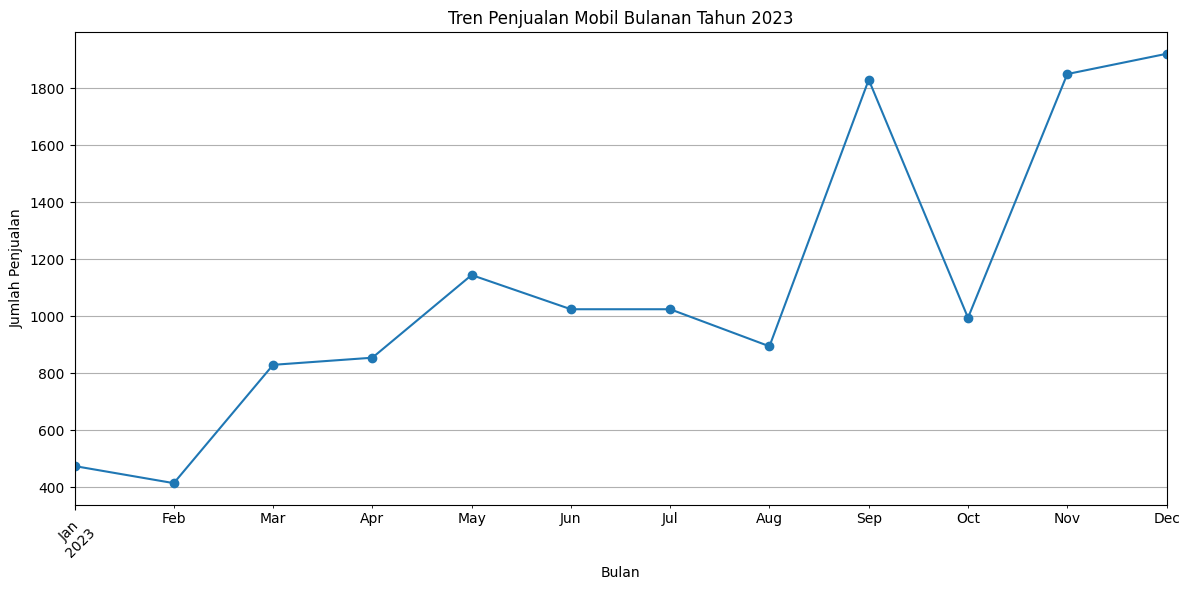

In [123]:
df_2023 = df[df['date'].dt.year == 2023]

# Group data berdasarkan bulan dan tahun, kemudian hitung jumlah penjualan
monthly_sales_2023 = df_2023.groupby(df_2023['date'].dt.to_period('M')).size()

# Plotting tren penjualan bulanan
plt.figure(figsize=(12, 6))
monthly_sales_2023.plot(kind='line', marker='o', linestyle='-')
plt.title('Tren Penjualan Mobil Bulanan Tahun 2023')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


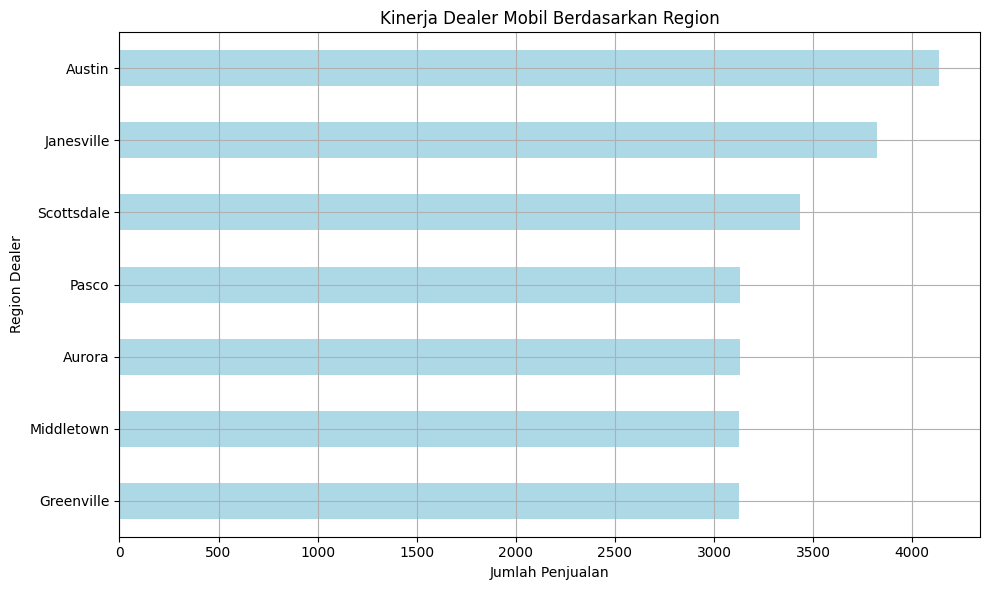

In [124]:
region_sales = df.groupby('dealer_region')['car_id'].count()

# Plotting grafik bar untuk kinerja dealer per region
plt.figure(figsize=(10, 6))
region_sales.sort_values().plot(kind='barh', color='lightblue')
plt.title('Kinerja Dealer Mobil Berdasarkan Region')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Region Dealer')
plt.grid(True)
plt.tight_layout()
plt.show()



1.   Persentase kenaikan penjualan dari tahun 2022 ke 2023: 23.61%
2.   Berdasarkan data, warna Pale White merupakan preferensi tertinggi pelanggan dengan kontribusi sebesar 46.01% terhadap total penjualan mobil.
3. Preferensi Jenis Bodi Mobil: SUV menjadi jenis bodi mobil paling populer lalu di ikuti model Hatcback
4. region : austin dan janesville merupakan region dengan jumlah penjualan terrbanyak






*   Untuk membangun model prediktif yang dapat memprediksi preferensi pelanggan atau permintaan mobil tertentu berdasarkan data historis tidak dapat dilakukab karna kurangnya data pada kolom customer_preferance

